In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
import pickle as pkl
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

#### chargement des donnée de test

In [8]:
X_test = joblib.load("X_test.joblib")

In [9]:
y_test = joblib.load("y_test.joblib")

#### chargement de modèle

In [10]:
model_svc_c10 = joblib.load("clf_svc_best.pkl")

In [11]:
model_svc_c10

SVC(C=10, gamma=0.001, random_state=42)

#### test avec le modèle

In [12]:
y_test_c10_pred = model_svc_c10.predict(X_test)

In [13]:
accuracy_test_c10 = accuracy_score(y_test, y_test_c10_pred)
print(f'test accuracy: {accuracy_test_c10}')

test accuracy: 0.88272


In [20]:
"""# test score = accuracy
model_svc_c10.score(X_test, y_test)"""

'# test score = accuracy\nmodel_svc_c10.score(X_test, y_test)'

#### Courbe ROC, AUC for test

In [15]:
roc_auc_score = roc_auc_score(y_test, y_test_c10_pred)

In [16]:
print('AUC_test : {:.3f}'.format(roc_auc_score))

AUC_test : 0.883


In [17]:
from sklearn.metrics import plot_roc_curve

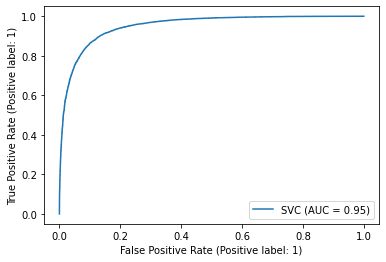

In [19]:
plot_roc_curve(model_svc_c10, X_test, y_test) 
plt.show()

In [ ]:
"""from sklearn.metrics import roc_curve"""

In [ ]:
"""roc_test = roc_curve(y_test, y_test_c10_pred)"""

In [ ]:
"""#fig = plt.figure(figsize=(10, 7), dpi=100)
plt.plot(fpr, tpr)
plt.title('Courbe ROC for test')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.show()"""

#### matrix de confusion

In [14]:
#création de matrix de confusion
cm_test_c10 = confusion_matrix(y_test, y_test_c10_pred)

In [15]:
cm_test_c10

array([[10971,  1529],
       [ 1403, 11097]], dtype=int64)

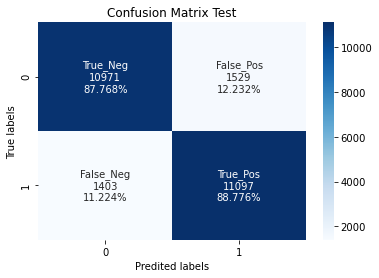

In [16]:
#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test_c10.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test_c10.flatten()[0:2]/np.sum(cm_test_c10.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test_c10.flatten()[2:]/np.sum(cm_test_c10.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test_c10, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

modèle over fitting

In [8]:
# modèle over fitting
model_svc = joblib.load("clf_svc.pkl")

In [9]:
model_svc 

SVC(C=100, gamma=0.01, random_state=42)

In [12]:
y_test_pred = model_svc.predict(X_test)

In [13]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'test accuracy: {accuracy_test}')

test accuracy: 0.88572


In [11]:
# test score = accuracy
model_svc.score(X_test, y_test)

0.88572

In [15]:
#création de matrix de confusion
cm_test = confusion_matrix(y_test, y_test_pred)

In [16]:
cm_test

array([[11003,  1497],
       [ 1360, 11140]], dtype=int64)

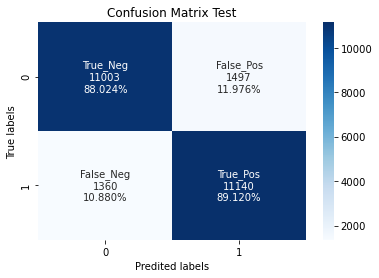

In [20]:
# Matrice de confusion pour le train
#c_m_TRAIN = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train_scaled))
#c_m_TRAIN

#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test.flatten()[0:2]/np.sum(cm_test.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test.flatten()[2:]/np.sum(cm_test.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

https://note.nkmk.me/python-sklearn-roc-curve-auc-score/

https://ichi.pro/shizen-gengo-shori-no-shoshinshamuke-gaido-pa-to-1-126973807478989